In [72]:
#Importing all Librariesfrom sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns

In [73]:
import pandas as pd
print('Dimension of Dataset')
print(iris.data.shape)
labels = ['Sepal Length','Sepal Width', 'Petal Length', 'Petal Width']
data = pd.DataFrame(iris.data,index=np.arange(iris.data.shape[0]),columns = labels)
data.head()


Dimension of Dataset
(150, 4)


,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


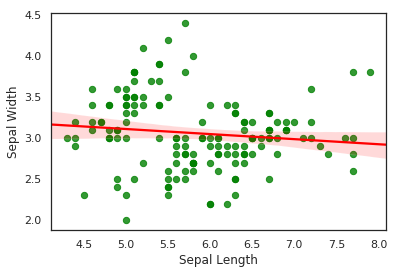

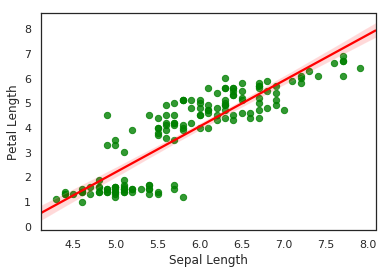

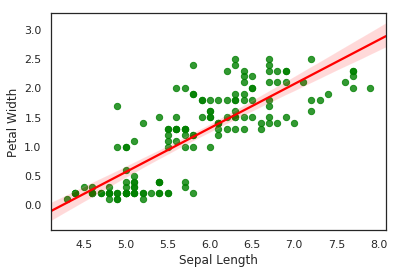

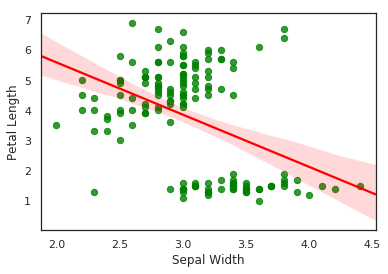

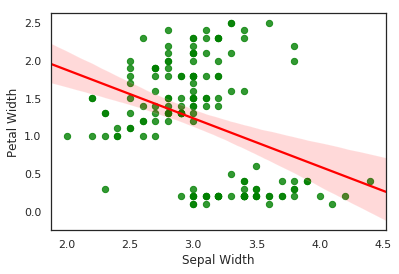

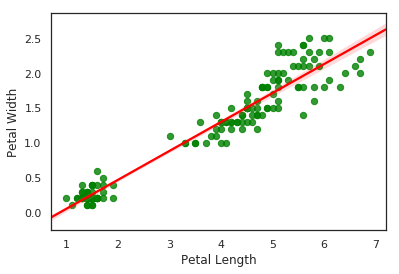

In [76]:
for i in range(4):
    for j in range(i,4):
        if(i!=j):   
            
            sns.regplot(x=iris.data[:,i], y=iris.data[:,j],
                        scatter_kws={"color":"green","alpha":0.8,"s":40},
                        line_kws={"color": "red"})
            sns.set(style="white",color_codes=True)
            plt.xlabel(str(labels[i]))
            plt.ylabel(str(labels[j]))
            plt.show()
           
           
#plt.show()

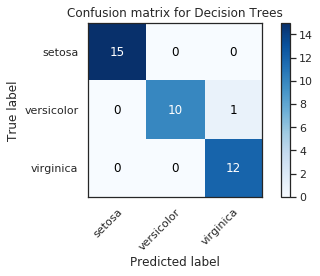

The accuracy of train set for Decision Tree: 94.643 %
The accuracy of the test set for Decision Tree: 97.368 %


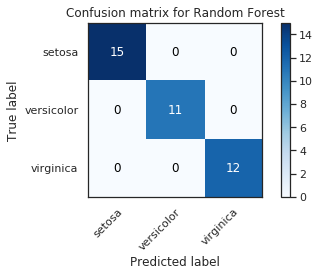


The accuracy of train set Random Forest: 	100.000 %
The accuracy of the test set Random Forest: 	100.000 %


In [77]:
iris = load_iris()
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)

DT = DecisionTreeClassifier(max_leaf_nodes = 3).fit(X_train, y_train)
RF = RandomForestClassifier().fit(X_train, y_train)

DT_pred = DT.predict(X_test)
RF_pred = RF.predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,
                          title=None,cmap=plt.cm.Blues):
   
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, DT_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, DT_pred, classes=class_names,
                      title='Confusion matrix for Decision Trees')
plt.show()

print('The accuracy of train set for Decision Tree: \t{:.3f} %' .format(DT.score(X_train, y_train)*100))
print('The accuracy of the test set for Decision Tree: \t{:.3f} %' .format(DT.score(X_test, y_test)*100))


plot_confusion_matrix(y_test, RF_pred, classes=class_names,
                      title='Confusion matrix for Random Forest')
plt.show()
print('\nThe accuracy of train set Random Forest: \t{:.3f} %' .format(RF.score(X_train, y_train)*100))
print('The accuracy of the test set Random Forest: \t{:.3f} %' .format(RF.score(X_test, y_test)*100))







